In [ ]:
import pandas as pd
import numpy as np



import matplotlib.pyplot as plt
import seaborn as sns


# imposta il tema di default di seaborn
sns.set_theme()

# **1. ANALISI ESPLORATIVA (EDA)**



In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/FabioGagliardiIts/datasets/main/boston_housing/BostonHousing.csv")
display(df)

,Unnamed: 0,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.538,6.575,65.200000,4.0900,1,296,15.3,396.90,4.980000,24.0
1,1,0.02731,12.5,7.07,0.469,6.421,78.900000,4.9671,2,242,17.8,396.90,9.140000,21.6
2,2,0.02729,12.5,7.07,0.469,7.185,61.100000,4.9671,2,242,17.8,392.83,4.030000,34.7
3,3,0.03237,12.5,2.18,0.458,6.998,45.800000,6.0622,3,222,18.7,394.63,2.940000,33.4
4,4,0.06905,12.5,2.18,0.458,7.147,54.200000,6.0622,3,222,18.7,396.90,12.715432,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,12.5,11.93,0.573,6.593,69.100000,2.4786,1,273,21.0,391.99,12.715432,22.4
502,502,0.04527,12.5,11.93,0.573,6.120,76.700000,2.2875,1,273,21.0,396.90,9.080000,20.6
503,503,0.06076,12.5,11.93,0.573,6.976,91.000000,2.1675,1,273,21.0,396.90,5.640000,23.9
504,504,0.10959,12.5,11.93,0.573,6.794,89.300000,2.3889,1,273,21.0,393.45,6.480000,22.0


## **1.1 Eliminazione variabili non pertinenti**

In [ ]:
df = df.drop(['Unnamed: 0'], axis = 1)


## **1.2 Descrizione variabili**

1. **CRIM**      per capita crime rate by town
2. **ZN**        proportion of residential land zoned for lots over 25,000 sq.ft.
3. **INDUS**     proportion of non-retail business acres per town
4. **NOX**       nitric oxides concentration (parts per 10 million)
5. **RM**        average number of rooms per dwelling
6. **AGE**       proportion of owner-occupied units built prior to 1940
7. **DIS**       weighted distances to five Boston employment centres
8. **TAX**      full-value property-tax rate per 10,000
9. **PTRATIO**  pupil-teacher ratio by town
10. **B**        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
11. **LSTAT**    % lower status of the population
12. **MEDV**     Median value of owner-occupied homes in 1000's

In [ ]:
display(df)

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.538,6.575,65.200000,4.0900,1,296,15.3,396.90,4.980000,24.0
1,0.02731,12.5,7.07,0.469,6.421,78.900000,4.9671,2,242,17.8,396.90,9.140000,21.6
2,0.02729,12.5,7.07,0.469,7.185,61.100000,4.9671,2,242,17.8,392.83,4.030000,34.7
3,0.03237,12.5,2.18,0.458,6.998,45.800000,6.0622,3,222,18.7,394.63,2.940000,33.4
4,0.06905,12.5,2.18,0.458,7.147,54.200000,6.0622,3,222,18.7,396.90,12.715432,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,12.5,11.93,0.573,6.593,69.100000,2.4786,1,273,21.0,391.99,12.715432,22.4
502,0.04527,12.5,11.93,0.573,6.120,76.700000,2.2875,1,273,21.0,396.90,9.080000,20.6
503,0.06076,12.5,11.93,0.573,6.976,91.000000,2.1675,1,273,21.0,396.90,5.640000,23.9
504,0.10959,12.5,11.93,0.573,6.794,89.300000,2.3889,1,273,21.0,393.45,6.480000,22.0


## **1.3 Problema dei valori mancanti  (imputazione)**



Regole generali:
- Una colonna che persenta più del 50% di valori mancanti può essere eliminata.
- Se l'assenza di dato intacca la coerenza di una riga nella tabella, si considera l'eliminazione della riga.
- Si sostiuisce il valore mancante con con la media o la mediana.
- In caso di valori ordinati in modo crescente o decrescente, si sostituisce con la media tra i due primi valori utili a precedere e a seguire il dato mancante.



***sklearn doc***: [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html)

In [ ]:
from sklearn.impute import SimpleImputer


imp_mean = SimpleImputer(missing_values=np.nan, strategy='median')



Iteriamo su tutte le colonne per applicare la media a tutti i valori mancanti


In [ ]:
for column in df:
  if df[column].isnull().values.any():
    tmp = df[column].to_numpy()
    # imputazione dei valori mancanti
    df[column] = imp_mean.fit_transform(tmp)


## **1.4 Analisi univariata**

- visualizzare tramite istogramma o grafico a dispersione la distribuzione delle singole variabili.
- individuare possibili outlier

### **1.4.1 DataViz**

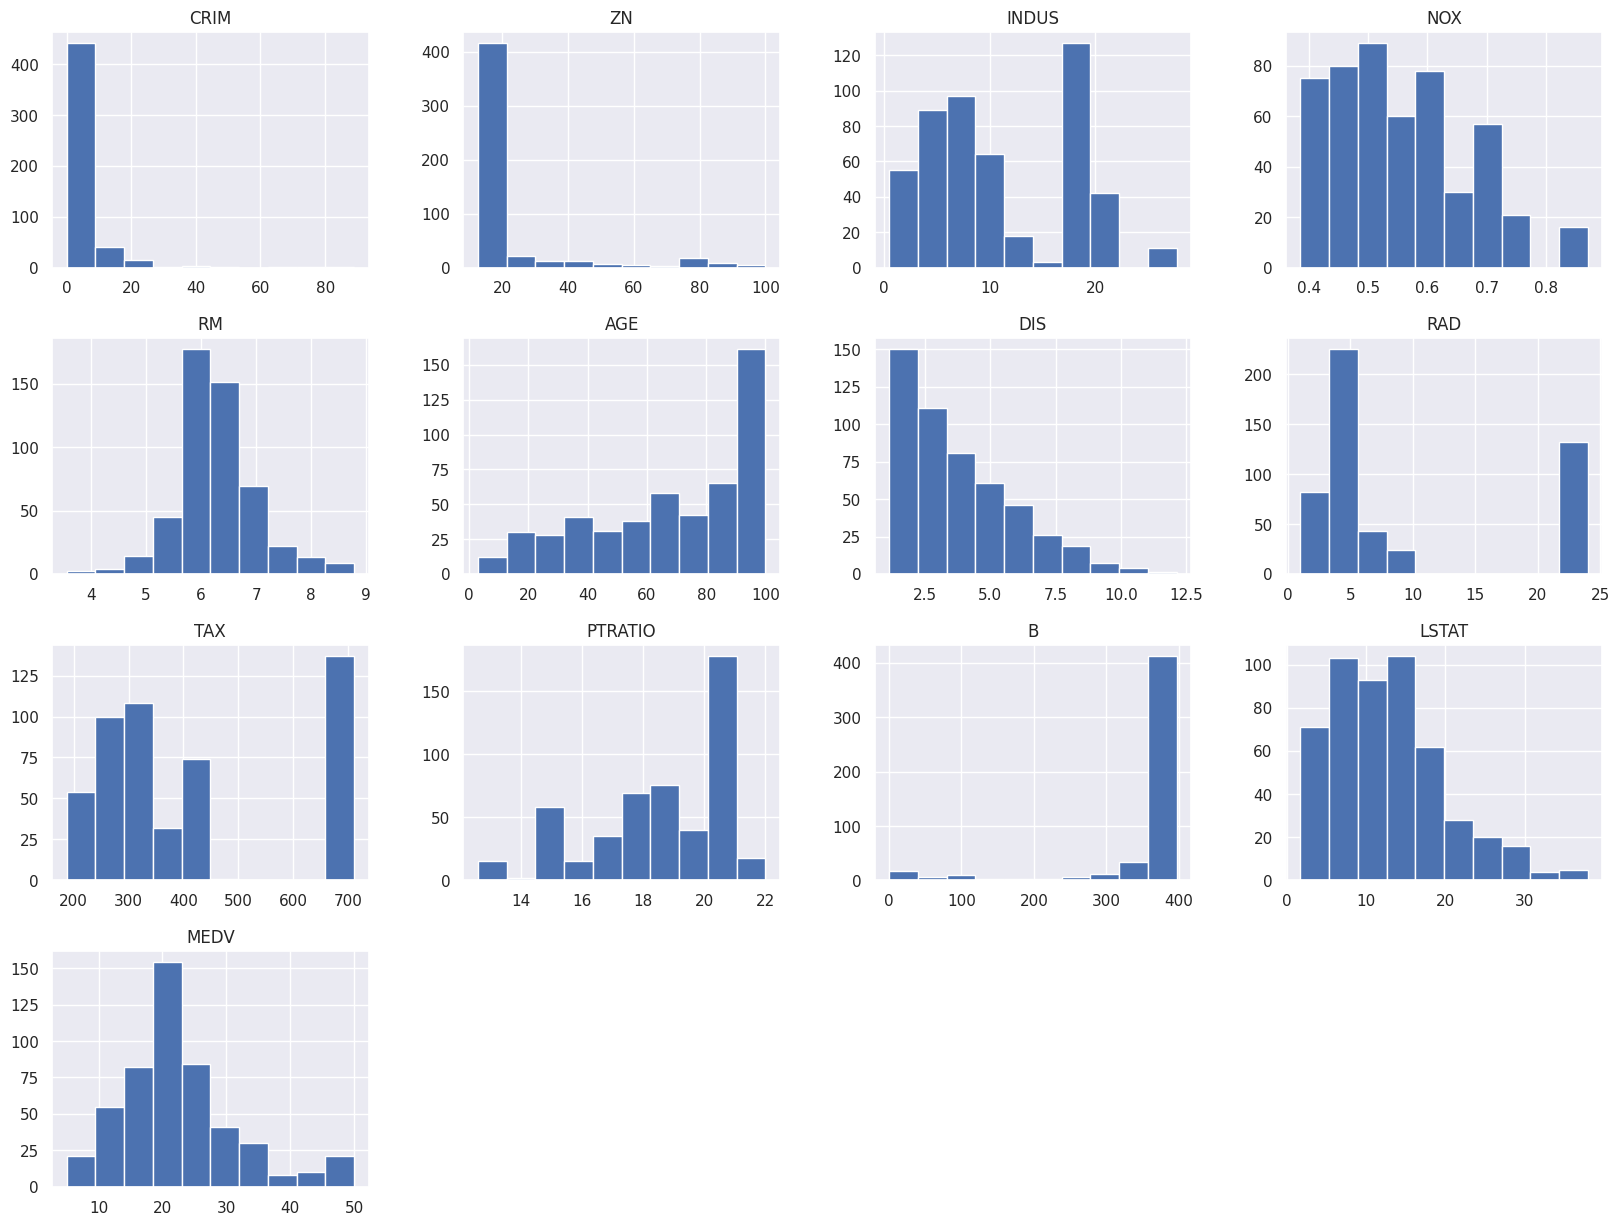

In [ ]:
df.hist(figsize=(20,15))
plt.xlabel("Valore medio case")
plt.ylabel("Case")
plt.title("MEDV Val Distribution", fontsize=15)
plt.show()

### **1.4.2 Eliminazione dgli outlier**
- Individuare la forma che assume la distribuzione
- Individuare anomalie tra gli indici statistici:
  - osservare la differenza tra minimo e massimo
  - il valore massimo è fuori scala rispetto alla media?
  - il valore massimo è fuori scala rispetto all deviazione standard?
  - il valore massimo è fuori scala rispetto allo scarto interquaritle?
- visualizzare la distribuzione per individuare anomalie nel grafico   
- Scegliere la tipologia di intervento
  - **distribuzione normale (forma a campana):** si usa la terza deviazione standard per imporre un limite superiore e un limite inferiore. Gli outlier che escono al di fuori di questo range assumono il valore del corrispettivo limite.
  - **distribuzione generica:** si usa lo scarto interquartile per contenere i valori della distribuzione tra il 25-esimo e il 75-esimo percentile.


#### **1.4.2.1 Utilitis**

In [ ]:
def normal_distribution_limits(data: pd.DataFrame):
  mean = data.mean()
  std  = data.std()

  up_limit = mean + std
  low_limit = mean - std

  return mean, up_limit, low_limit



def plot_normal_distribution(data: pd.DataFrame, mean: float, up_limit: float, low_limit: float):
    plt.figure(figsize=(12, 8))
    plt.scatter(np.arange(len(data)),data, alpha=0.5)
    # terza deviazione standard postitiva
    plt.axhline(up_limit, color = 'brown', linestyle = '-', label='up limit')
    # media
    plt.axhline(mean, color = 'r', linestyle = '-', label='mean')
    # terza deviazione standard negativa
    plt.axhline(low_limit, color = 'brown', linestyle = '-', label='low limit')
    plt.legend()
    plt.show()

In [ ]:
def interquartile_range_limits(data: pd.DataFrame):
  q25 = data.quantile(0.25)
  q75 = data.quantile(0.75)

  iqr  = (q75 - q25)
  up_limit  = q75 + iqr * 1.5
  low_limit = q25 - iqr * 1.5

  return up_limit, low_limit


def plot_generic_distribution(data: pd.DataFrame,  up_limit: float, low_limit: float) :
  plt.figure(figsize=(12, 8))
  plt.scatter(np.arange(len(data)),data, alpha=0.5)
  # up limit
  plt.axhline(up_limit, color = 'brown', linestyle = '-', label='up_limit')
  # low limit
  plt.axhline(low_limit, color = 'brown', linestyle = '-', label = 'low limit')
  plt.legend()
  plt.show()

In [ ]:
def plot_scatter(data):
  plt.figure(figsize=(12, 8))
  plt.scatter(np.arange(len(data)),data, alpha=0.5)
  plt.show()

In [ ]:
def plot_scatter_2(x, y):
    plt.figure(figsize=(12, 8))
    plt.scatter(x, y, alpha=0.5)
    plt.show()

#### **1.4.2.2 Studio delle variabili**

Indaghiamo la variabile ***CRIM***

In [ ]:
df_crim = df["CRIM"]


Forma della distribuzione

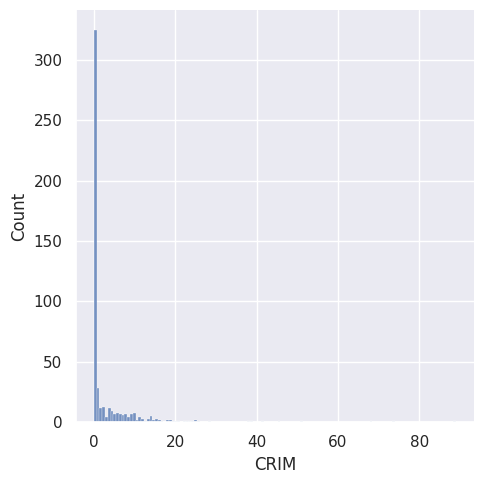

In [ ]:
sns.displot(df_crim)
plt.show()

Indici statistici

In [ ]:
display(df_crim.describe())


count    506.000000
mean       3.472349
std        8.573458
min        0.006320
25%        0.081900
50%        0.224635
75%        2.808720
max       88.976200
Name: CRIM, dtype: float64

L'analisi indica che non si tratta di una distribuzione normale, pertanto si applica lo scarto interquartile come metodo di contenimento dei valori.

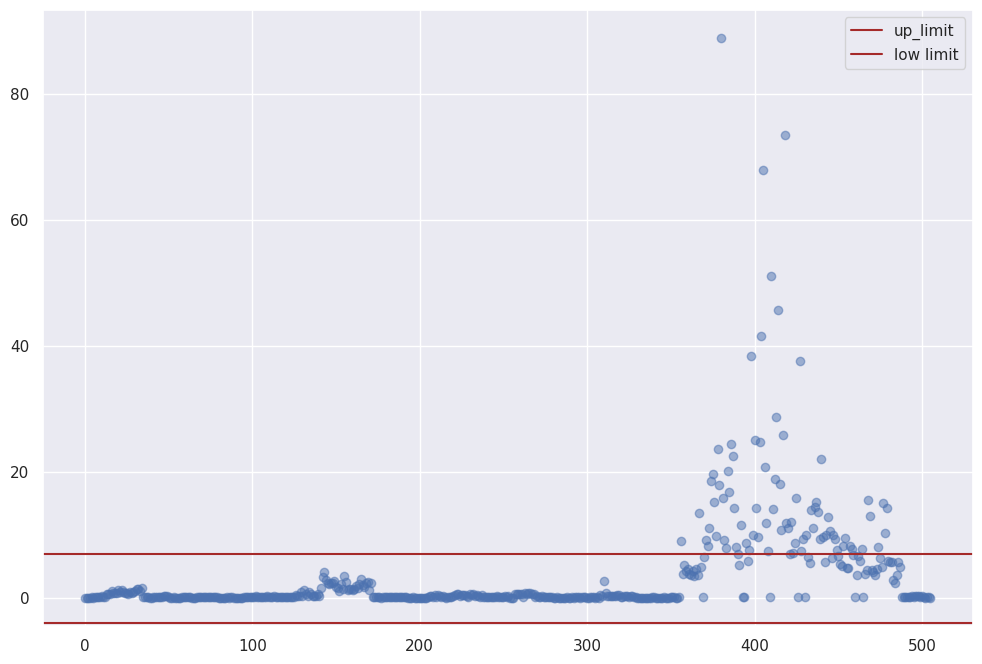

In [ ]:
# limiti dello scarto interquartile
crim_up_limit, crim_low_limit = interquartile_range_limits(df_crim)

# plot
plot_generic_distribution(df_crim, crim_up_limit, crim_low_limit)

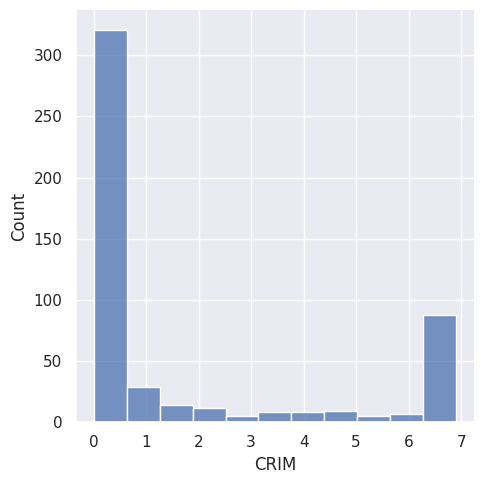

In [ ]:
# # cut
tmp_crim = df_crim.to_numpy()
tmp_crim[tmp_crim > crim_up_limit]  = crim_up_limit
tmp_crim[tmp_crim < crim_low_limit] = crim_low_limit

# plot
sns.displot(df_crim)
plt.show()

Indaghiamo la variabile ***B***

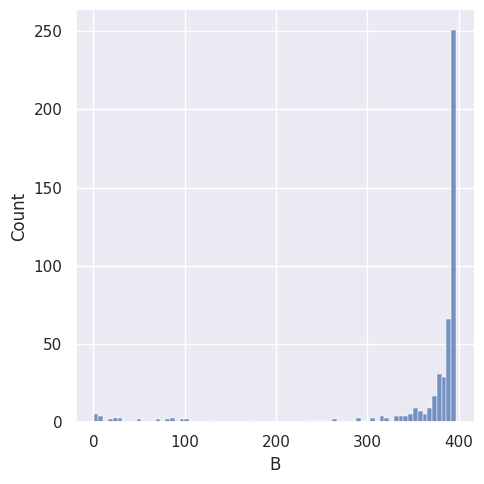

In [ ]:
df_b = df["B"]

# forma della distribuzione
sns.displot(df_b)
plt.show()

Anche in questo caso l'impiego dello scarto interquartile sembra essere la scelta più adatta.

In [ ]:
# display degli indici statistici
display(df_b.describe())


count    506.000000
mean     356.674032
std       91.294864
min        0.320000
25%      375.377500
50%      391.440000
75%      396.225000
max      396.900000
Name: B, dtype: float64

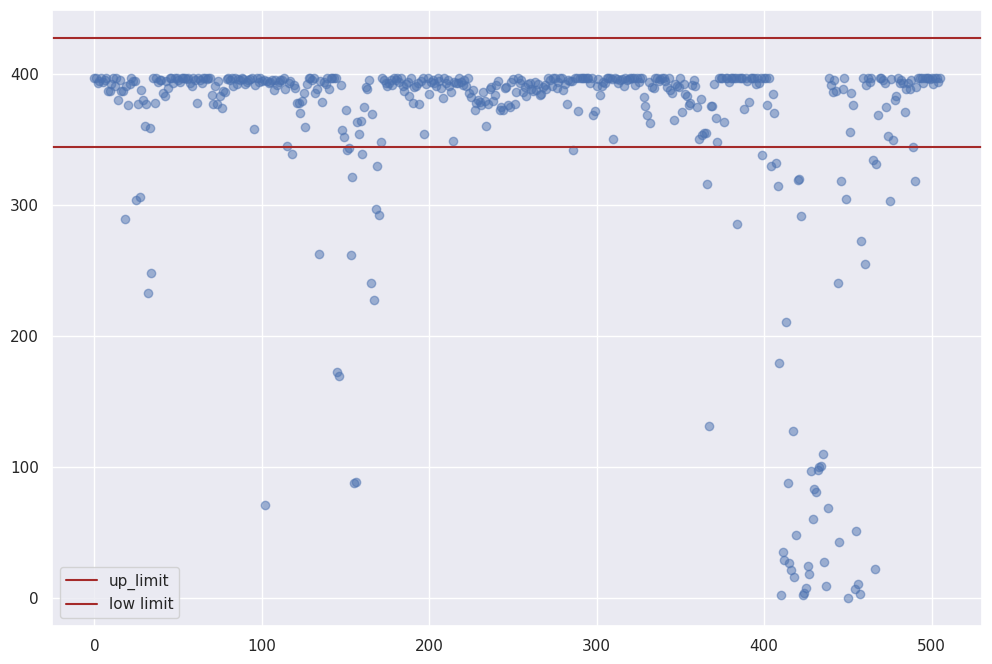

In [ ]:
# limiti dello scarto interquartile
b_up_limit, b_low_limit = interquartile_range_limits(df_b)

# plot
plot_generic_distribution(df_b, b_up_limit, b_low_limit)

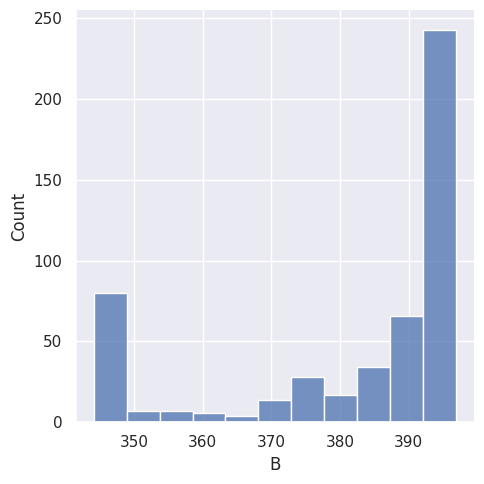

In [ ]:
# # cut
tmp_b = df_b.to_numpy()
tmp_b[tmp_b > b_up_limit]  = b_up_limit
tmp_b[tmp_b < b_low_limit] = b_low_limit

# plot
sns.displot(df_b)
plt.show()

## **1.5 Analisi multivariata**

- visualizzare correlazioni
- selezione delle features


###  **1.5.1 Correlazioni**

- visualizzare la matrice delle correlazioni
- visualizzare la correlazione tra il valore da predirre e le *feature*

### **1.5.2 Martrice delle correlazioni**

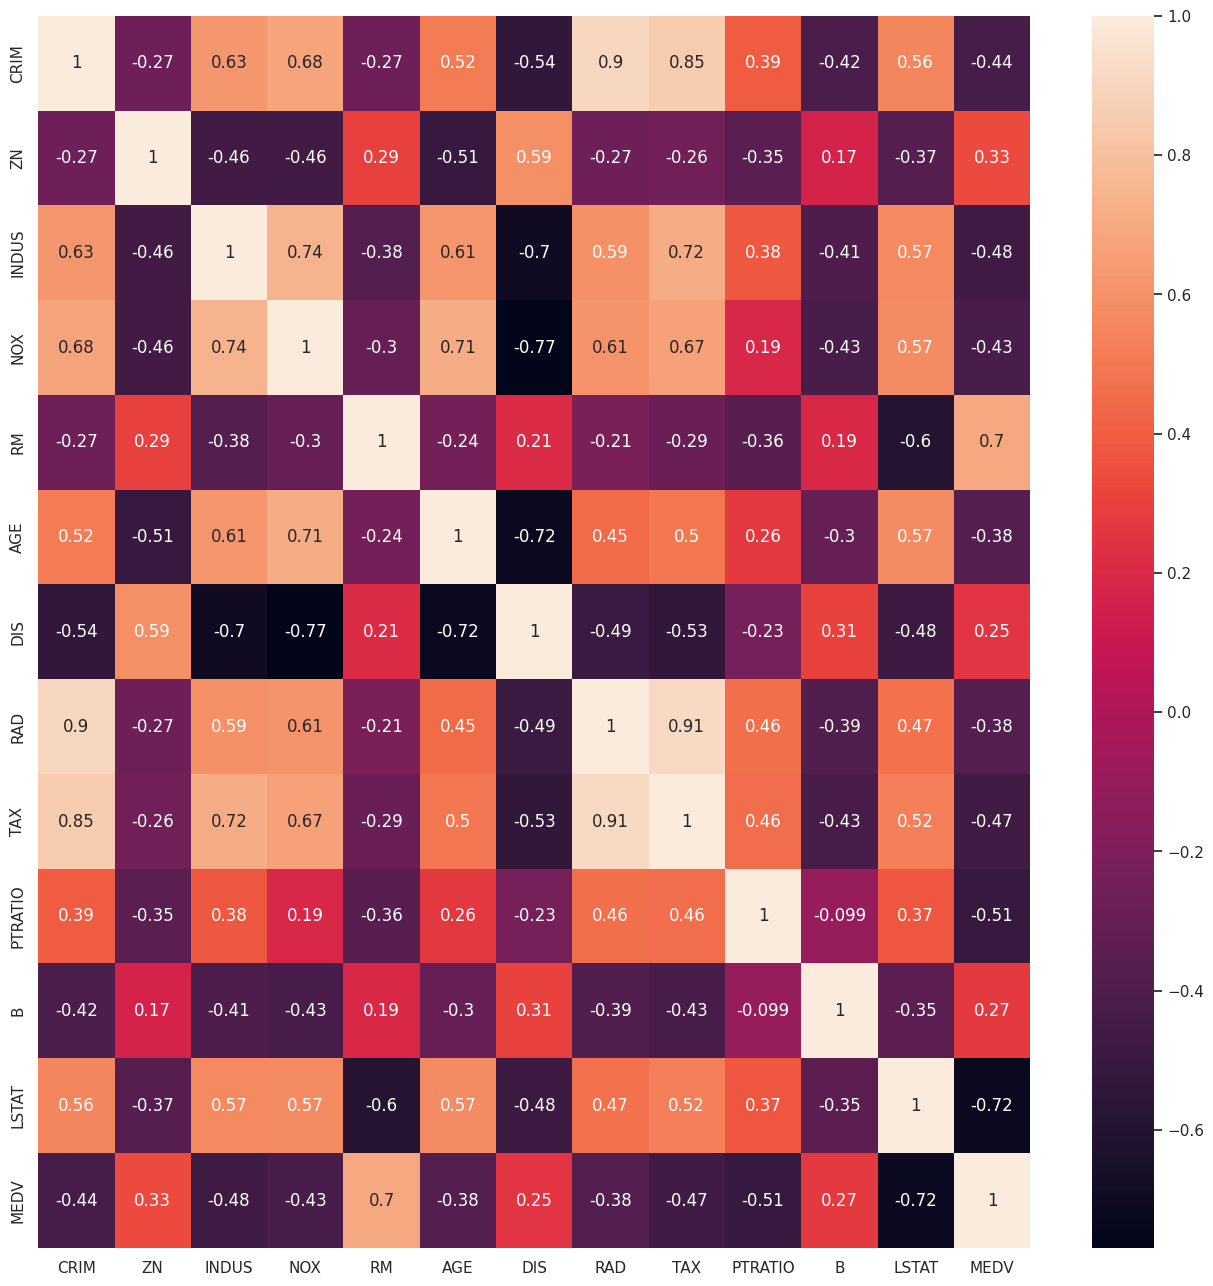

In [ ]:
# Correlation matrix
corr_matrix = df.corr()

# plot
plt.figure(figsize=(16, 16))
sns.heatmap(corr_matrix, annot=True)
plt.show()

### **1.5.3 Correlazione Feature-Labels**

In [ ]:
corr_fl = corr_matrix['MEDV'].sort_values(ascending=False)
display(corr_fl)

MEDV       1.000000
RM         0.695360
ZN         0.334583
B          0.271067
DIS        0.249929
AGE       -0.380223
RAD       -0.381626
NOX       -0.427321
CRIM      -0.442043
TAX       -0.468536
INDUS     -0.478657
PTRATIO   -0.507787
LSTAT     -0.721975
Name: MEDV, dtype: float64

## **1.6 Selezione delle features**

- Utilizzare la matrice di correlazione per:
  - individuare variabili con una scarsa correlazione sia con la variabile da predirre che con le altre.   
  - individuare variabili ridondanti
es.  \
Un dataset sulle quotazioni immobiliari potrebbe contenere sia il dato della media delle stanze per numero abitativo sia la media di una tipologia di stanza (bagni, camere da letto). Il secondo tipo di dato è del tutto superfluo poichè già contenuto nel primo.

- Aggregare le variabili che potrebbero essere sostituite da un unico valore in grado di rappresentarle tutte. \
es. \
In un dataset potrebbero esserci variabili riferite ad altezza e peso. Tuttavia sostituire i valori di entrambe con il corrispettivo indice di massa corporea potrebbe aumentare il vaore descrittivo e aumentare la resa del modello di apprendimento.


La variabile **B**, per il tipo di dato che rappresenta, poteva essere eliminto già all'inizio dell'analisi. A rafforzale tale valutazione si aggiunge una scarrsa correlazione di questa variabile con il resto del dataset in generale.

In [ ]:
df = df.drop(columns=['B'], axis=1)
display(df)

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.538,6.575,65.200000,4.0900,1,296,15.3,4.980000,24.0
1,0.02731,12.5,7.07,0.469,6.421,78.900000,4.9671,2,242,17.8,9.140000,21.6
2,0.02729,12.5,7.07,0.469,7.185,61.100000,4.9671,2,242,17.8,4.030000,34.7
3,0.03237,12.5,2.18,0.458,6.998,45.800000,6.0622,3,222,18.7,2.940000,33.4
4,0.06905,12.5,2.18,0.458,7.147,54.200000,6.0622,3,222,18.7,12.715432,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,12.5,11.93,0.573,6.593,69.100000,2.4786,1,273,21.0,12.715432,22.4
502,0.04527,12.5,11.93,0.573,6.120,76.700000,2.2875,1,273,21.0,9.080000,20.6
503,0.06076,12.5,11.93,0.573,6.976,91.000000,2.1675,1,273,21.0,5.640000,23.9
504,0.10959,12.5,11.93,0.573,6.794,89.300000,2.3889,1,273,21.0,6.480000,22.0


# **2. DATA SPLIT**

Uun set di dati può essere suddiviso al più in tre blocchi:

- **Training set**: il set di dati usato in fase di addestramento.
- **Validation set**: il set utilizzato per valutare il modello mentre si regolano gli iperparametri del modello scelto.
- **Test set**: il set usato per la valutazione finale della fase di training.

In generale per dataset non molto grandi conviene limitarsi ai set di training e test, usando quest'ultimo anche per la validazione. Un ulteriore divisione dei dati potrebbe risultare controproducente.

In [ ]:

from sklearn.model_selection import train_test_split


## **2.1 Features and Labels**

In [ ]:
X = df.drop("MEDV", axis=1).values
Y = df["MEDV"].values

# **3. TRAINING**




- Ricerca del modello di apprendimento
  - split
  - training
  - Validazione
- Regolarizzazione
- Ottimizzazione
- Test


##  **3.1 Ricerca del modello di apprendimento**

In [ ]:


# pipeline
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# validazione
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# ottimizzazione
from sklearn.model_selection import GridSearchCV

### **3.1.2 Utility**

### **Funzione di validazione**

Testare se un modello va in:
- **overfitting**: il modello si adatta troppo al set di training e non riesce a predirre nuove feature correttamente. In genere si manifesta con stime di errore fuori scala (valori di **mse** molto grandi e **r2** fuori dal range [0,1]).
- **underfitting**: il modello di addestramento scelto non è adatto ai valori da predirre (**mse** assume valori molot grandi e **r2** tende a zero)

In [ ]:

# testa e valida una pipeline generica
def pipeline_validation(pipeline, x, y):
    # split
    x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2)

    # trainging
    pipeline.fit(x_train, y_train)

    # predict
    y_pred = pipeline.predict(x_val)

    # error test
    mse = mean_squared_error(y_val, y_pred)
    r2  = r2_score(y_val, y_pred)

    scores_df = pd.DataFrame({'rmse': [np.sqrt(mse)], 'r2': [r2]})
    display(scores_df)
    print("\n")



### **Cross Validation e Learning Curve**

**Cross validation**

Ogni volta che si divide un dataset per ricavare il set di training e il set di validazione, si rischia di causare un alterzione dei dati.
Potrebbe capitare, infatti, di escludere dal set di training dati fondamentali per la risucita dell'apprendimento oppure di creare un set di tes poco coerente con la descrizione dei dati.

Una tecncia molto semplice per testare le performance del modello con i dati splittati secondo la nostra impostazione, viene chiamata **k-fold validation**.

Parendo da un esempio di split che vede l'80% dei dati assegnati al ***training*** e il 20% al ***test***.
Si parte con l'addetramento prendendo i blocchi di test in coda all'array di dati, si completa il giro ***traingin-test***, dopodichè si scala di volta in volta per k-volte il blocco di test verso la testa dell'array finché non saranno esaurite le combinazioni possibili.

Alla fine avremo un insieme di valori che ci diranno, per ogni iterazione,quale sia la combinazione più performante.


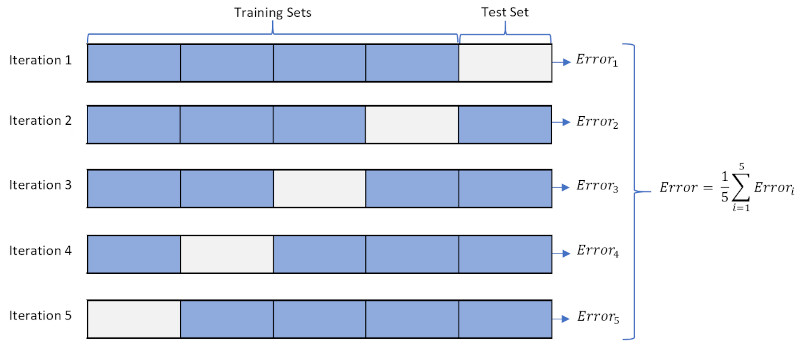

**Learning curve**
Visualizzare una ***learning curve*** genearata da sklearn, permette di verificare le performance di training su dataset di diverse dimensioni.

Nello specifico, questo metodo di validazione, visualizza e mette a confronto i livelli di accuratezza raggiunti in fase di addestramento, usando sia valori già noti al modello (trainng set) sia valori non noti (validation o tests set).

Il risutlato inlotre, fornisce le seguenti indicazioni:

- overfitting: Le due curve mostrano un andamento divergente.
- underfitting: le due curve tendono entrambe a zero o a valori negativi


In [ ]:
def plot_learning_curve(pipeline, x, y):

  x_len = len(X)
  train_size_60 = int((x_len * 60) / 100)
  train_size_70 = int((x_len * 70) / 100)
  train_size_80 = int((x_len * 80) / 100)

  train_sizes = [train_size_60, train_size_70, train_size_80]

  train_size_abs, train_scores, valid_scores = learning_curve(pipeline,
                                                           x,
                                                           y,
                                                           train_sizes = train_sizes)

  train_mean = np.mean(train_scores, axis=1)
  valid_mean = np.mean(valid_scores, axis=1)


  scores_df = pd.DataFrame({'train': train_mean, 'validation': valid_mean})
  display(scores_df)

  plt.figure(figsize=(12, 8))
  plt.plot(train_size_abs, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
  plt.plot(train_size_abs, valid_mean, color='red', marker='o', markersize=5, label='CrossValidation Accuracy')
  plt.legend()
  plt.show()


### **3.1.3 Ricerca**

,rmse,r2
0,5.655476,0.649792


,train,validation
0,0.752013,0.086027
1,0.752299,0.019850
2,0.717638,0.386468


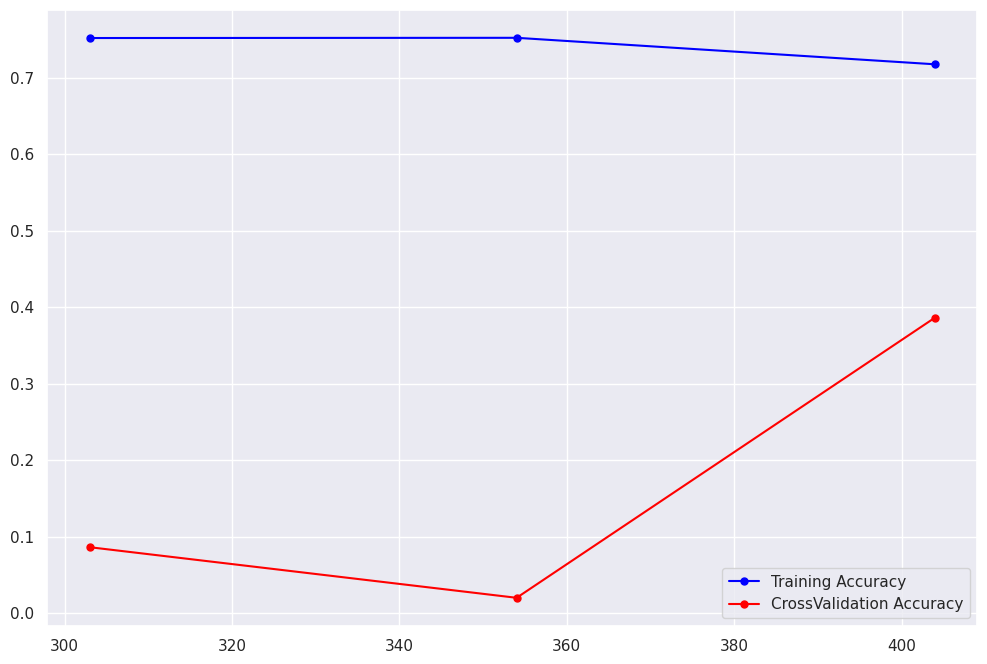

In [ ]:
# test 1
pipeline_validation(make_pipeline(StandardScaler(), LinearRegression()), X, Y)
plot_learning_curve(make_pipeline(StandardScaler(), LinearRegression()), X, Y)

Il modello va in overfitting a causa della non linearità del dataset

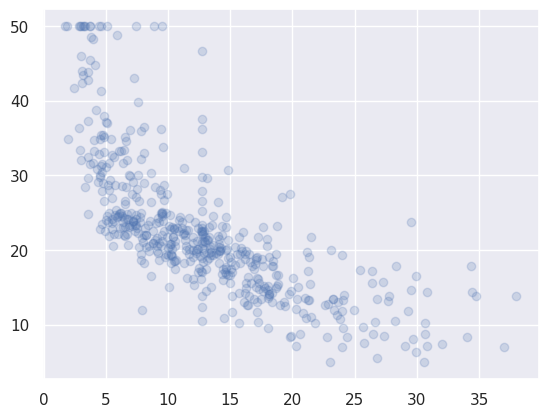

In [ ]:
# la percentuale di abitanti con un basso livello di istruzione
lstat = df[["LSTAT"]].values
# valore medio delle case abitate
y = df["MEDV"].values

plt.scatter(lstat, y, alpha = 0.2)
plt.show()

In questi casi si applica la regressione polinominale.

,rmse,r2
0,346.6856,-1516.885905


,train,validation
0,1.000000,-3.651529e+06
1,0.998291,-5.699352e+19
2,0.989627,-1.057871e+19


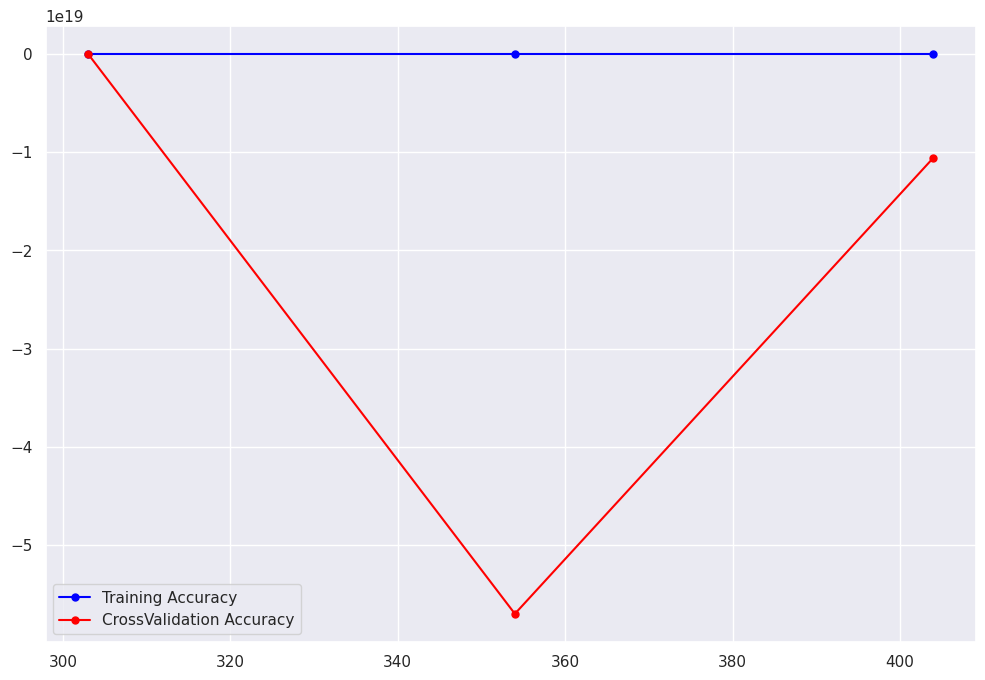

In [ ]:
# test 2
pipeline_validation(make_pipeline(StandardScaler(), PolynomialFeatures(degree = 3), LinearRegression()), X, Y)
plot_learning_curve(make_pipeline(StandardScaler(), PolynomialFeatures(degree = 3), LinearRegression()), X, Y)

IL modello, nonostante il passagio ad un approccio polinominale, resta in overfitting.

Scrivamo una nuova funzione di validazioe per la regressione polinominale e cerchiamo di capire attorno a quale esponente il modello degenera.

In [ ]:


# visualizza gli errori accumulati durante
# un processo di validazione iterativo
def plot_errors_curves(mse_errors, r2_errors, y):
  max_y = np.max(y)
  min_y = np.min(y)
  plt.figure(figsize=(12, 8))
  plt.axhline(max_y, color = 'brown', linestyle = '-', label = f'max y={max_y}')
  plt.plot(np.sqrt(mse_errors), "b", label= 'rmse')
  plt.axhline(min_y, color = 'brown', linestyle = '-', label = f'min y={min_y}')
  plt.legend()
  plt.show()

  plt.figure(figsize=(12, 8))
  plt.plot(r2_errors, "g", label="r2")
  plt.legend()
  plt.show()



# testa e valida una pipeline con regressione polinominale
def pipeline_poly_validation(regressor, x, y, n):
  # split
  x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2)

  mse_errors = np.zeros(n - 1)
  r2_errors  = np.zeros(n - 1)


  for i in range(1,n):
    pipe = make_pipeline(StandardScaler(), PolynomialFeatures(degree = i), regressor)

    # training
    pipe.fit(x_train, y_train)

    # predict
    y_pred = pipe.predict(x_val)

    # error test
    mse = mean_squared_error(y_val, y_pred)
    r2  = r2_score(y_val, y_pred)

    print("Grado:", i, " - MSE:", mse, " - R2:", r2)
    mse_errors[i - 1] = mse
    r2_errors[i - 1] = r2

  plot_errors_curves(mse_errors, r2_errors, y_val)


Grado: 1  - MSE: 23.862802569132047  - R2: 0.6839882228538154
Grado: 2  - MSE: 17.207022536819515  - R2: 0.7721297925714445
Grado: 3  - MSE: 341279.20268801897  - R2: -4518.513038421645
Grado: 4  - MSE: 3992.287652994942  - R2: -51.869310402528725
Grado: 5  - MSE: 222.85769918163828  - R2: -1.9512735297990145
Grado: 6  - MSE: 208.8756092953724  - R2: -1.7661106571491705
Grado: 7  - MSE: 766.303898818565  - R2: -9.148056004660345


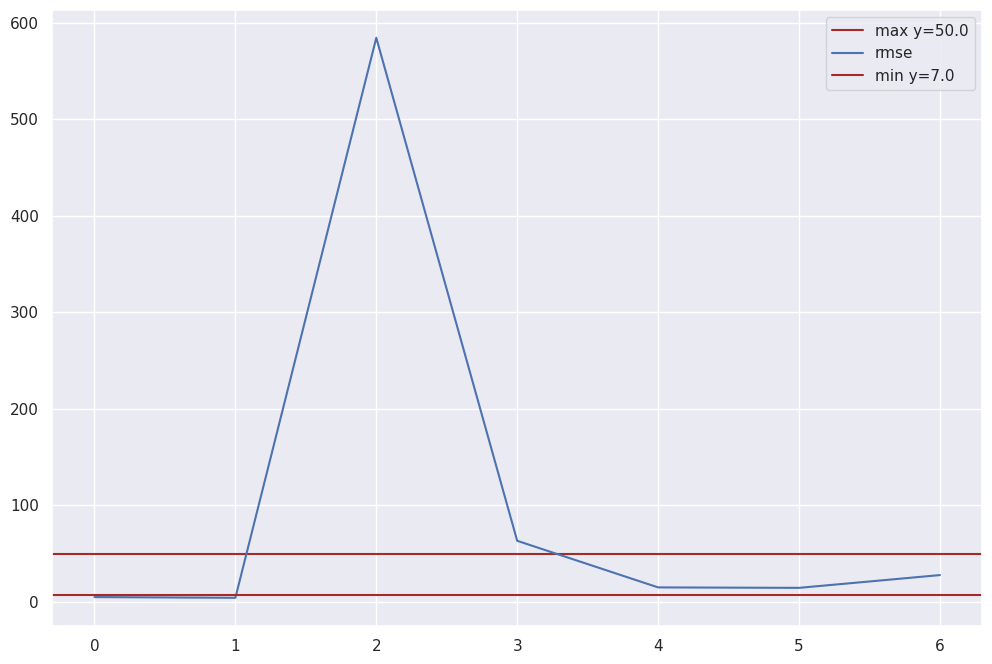

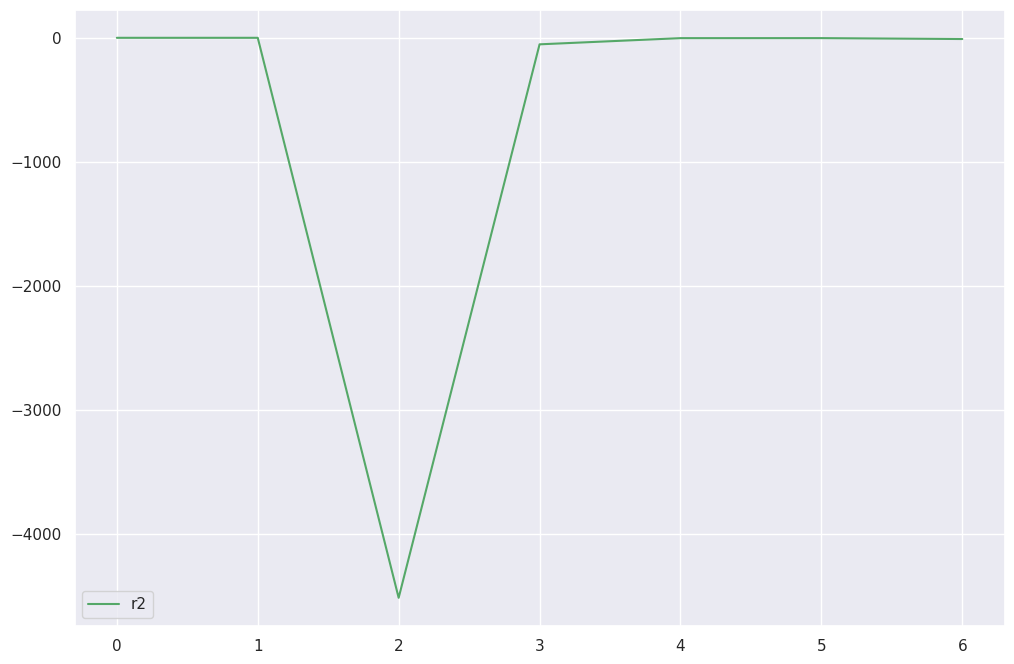

In [ ]:

pipeline_poly_validation(LinearRegression(), X, Y, 8)

Il risultato indica chiaramente che già andando verso il secondo grado del polinomio, il modello degenera

### **3.1.4 Regolarizzazione**


- **Lasso Regression (Least Absolute Shrinkage Selection Operator)**: per la regolarizzazione L1
- **Ridge Regression**: per la regolarizzazione L2
- **ElasticNet**: implementa  la possibilità di combinare le due tipologie di regolarizzazione.

,rmse,r2
0,5.377688,0.653473


,train,validation
0,0.979772,-13086.133455
1,0.966018,-27113.701272
2,0.957421,-3.803844


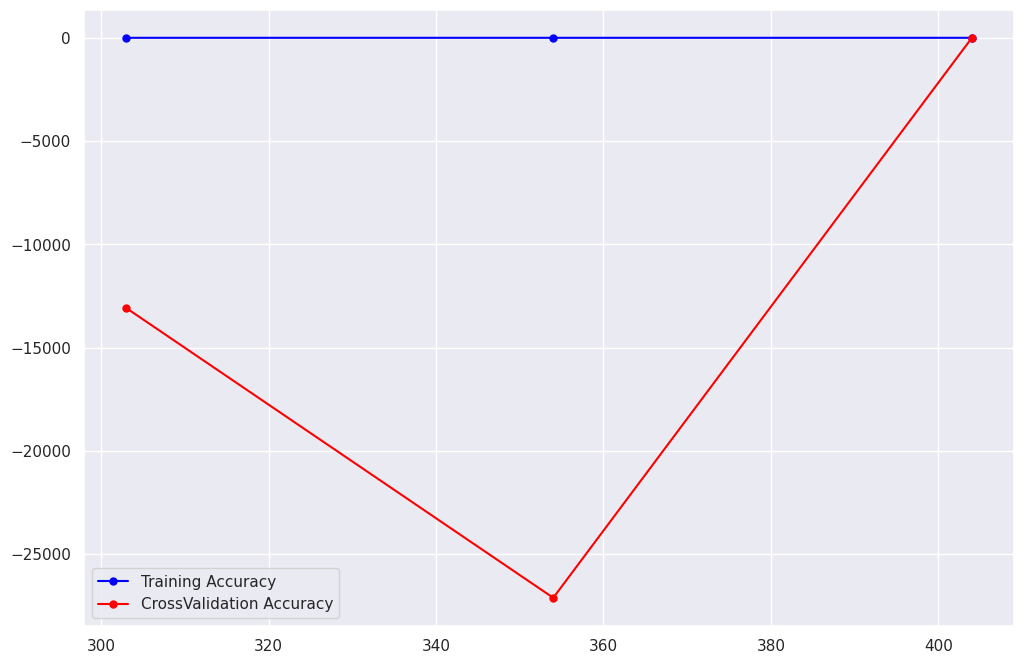

In [ ]:
from sklearn.linear_model import Ridge

pipeline_validation(make_pipeline(StandardScaler(), PolynomialFeatures(degree = 3), Ridge()), X, Y)
plot_learning_curve(make_pipeline(StandardScaler(), PolynomialFeatures(degree = 3), Ridge()), X, Y)


Grado: 1  - MSE: 22.318102896743977  - R2: 0.7236239438826828
Grado: 2  - MSE: 11.65036984203254  - R2: 0.8557277343801996
Grado: 3  - MSE: 18.44327267020927  - R2: 0.7716078742861074
Grado: 4  - MSE: 167.03452319465666  - R2: -1.0684707373900824
Grado: 5  - MSE: 670.6126498120829  - R2: -7.304526607612635
Grado: 6  - MSE: 2093.9038388497816  - R2: -24.92984213522204
Grado: 7  - MSE: 5768.223187036925  - R2: -70.43074761387122


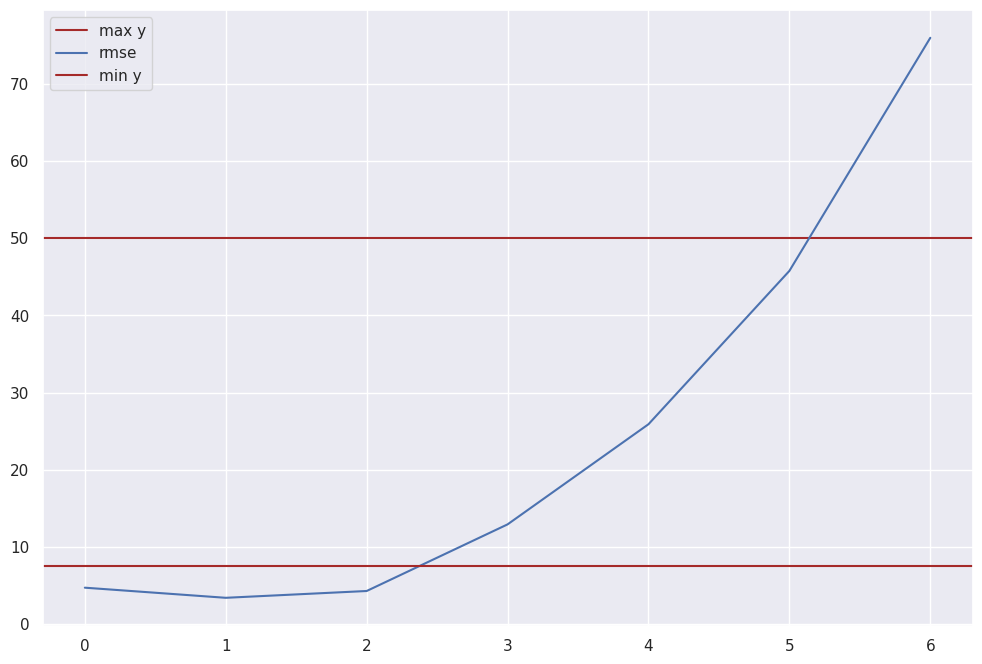

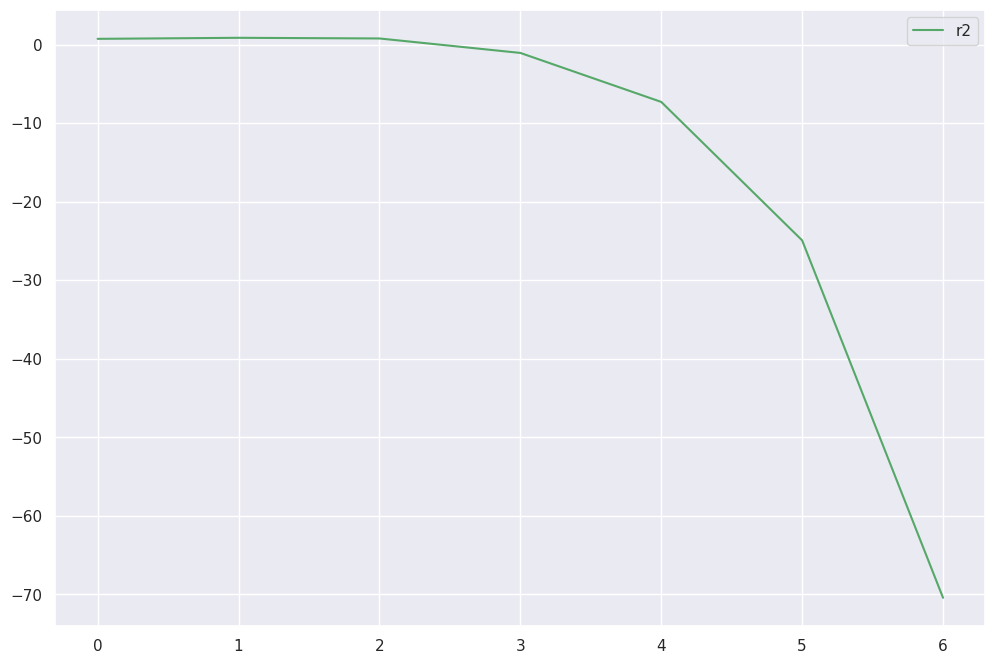

In [ ]:
pipeline_poly_validation(Ridge(), X, Y, 8)

Il risultato migliora ma il modello mantiene ancora l' overfitting attorno al terzo grado del polinomio.


Manteniamo fisso il grado del polinomio e validamo iterativamente l'iperparametro ***alpha*** del modello di regolarizzazione scelto.

In [ ]:
def test_pipeline_ridge( x, y, polyDegree, maxAlpha):
  # split
  x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2)

  mse_errors = np.zeros(maxAlpha - 1)
  r2_errors  = np.zeros(maxAlpha - 1)


  for i in range(1,maxAlpha):
    pipe = make_pipeline(StandardScaler(), PolynomialFeatures(degree = polyDegree), Ridge(alpha=i))

    # training
    pipe.fit(x_train, y_train)

    # predict
    y_pred = pipe.predict(x_val)

    # error test
    mse = mean_squared_error(y_val, y_pred)
    r2  = r2_score(y_val, y_pred)
    print("Grado:", i, " - MSE:", mse, " - R2:", r2)
    mse_errors[i - 1] = mse
    r2_errors[i - 1] = r2

  plot_errors_curves(mse_errors, r2_errors, y_val)

Grado: 1  - MSE: 9.275479304252784  - R2: 0.8989294231867229
Grado: 2  - MSE: 8.122849356880332  - R2: 0.9114890947478225
Grado: 3  - MSE: 7.730712694145337  - R2: 0.9157620252770391
Grado: 4  - MSE: 7.520599562505629  - R2: 0.9180515301871662
Grado: 5  - MSE: 7.385172416478012  - R2: 0.9195272167060193
Grado: 6  - MSE: 7.2894436640452565  - R2: 0.9205703283241498
Grado: 7  - MSE: 7.2182285365628545  - R2: 0.9213463263913524
Grado: 8  - MSE: 7.163684453966999  - R2: 0.9219406678489616
Grado: 9  - MSE: 7.12125491350115  - R2: 0.9224030027847788


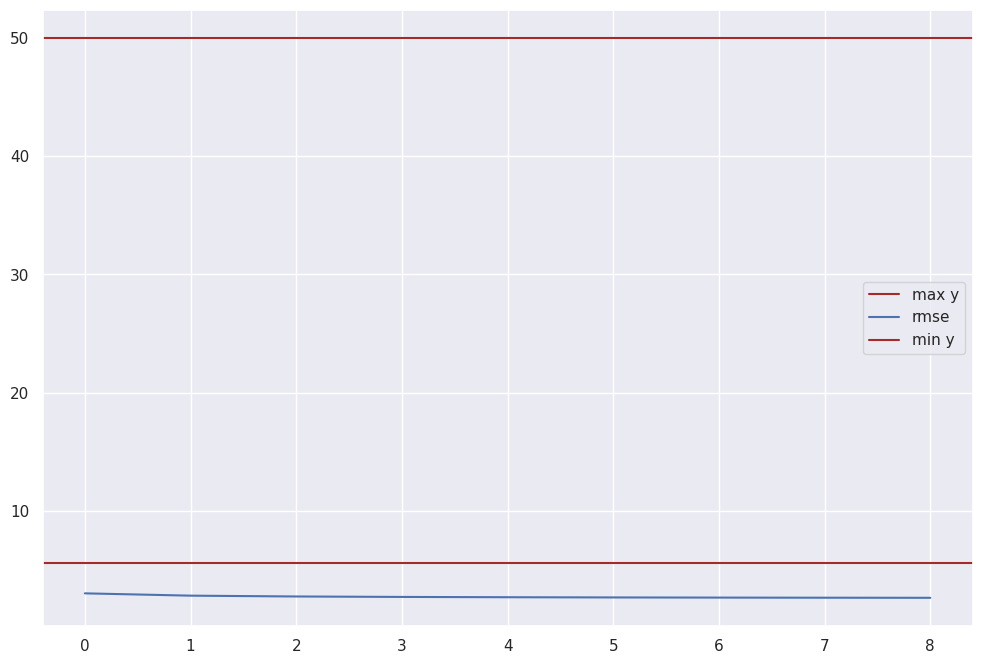

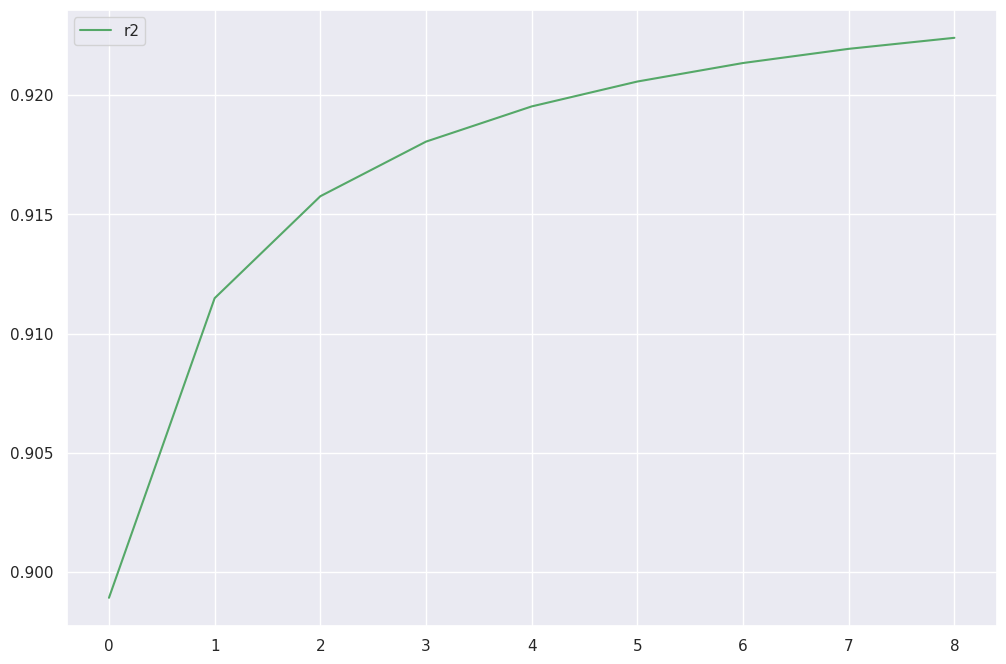

In [ ]:
test_pipeline_ridge(X, Y, 3, 10)

Impostando il grado massimo del polinomio a 3 e iternando sull'iperparametro ***alpha*** del modello di apprendimento otteniamo un netto miglioramento dei valori predetti.

##  **3.2 Ottimizzazione**

In [ ]:
def ottimization( x, y):
  # split
  x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2)

  pipe = make_pipeline(StandardScaler(), PolynomialFeatures(), Ridge())

  grid_parameter = {
      'polynomialfeatures__degree': [1, 2 , 3],
      'ridge__alpha': [0.0001, 0.001, 0.01, 0.1, 1., 10.],
      'ridge__fit_intercept': [True, False]
      }

  grid_search = GridSearchCV(pipe, grid_parameter)
  grid_search.fit(x_train, y_train)

  print("MIGLIOR SCORE: ", grid_search.best_score_)
  print("I MIGLIORI IPERPARAMETRI: ", grid_search.best_params_)

  return grid_search.best_params_["polynomialfeatures__degree"], \
         grid_search.best_params_["ridge__alpha"], \
         grid_search.best_params_["ridge__fit_intercept"]



In [ ]:
poly_degree, ridge_alpha, ridge_intercept = ottimization(X, Y)

MIGLIOR SCORE:  0.7914635198759133
I MIGLIORI IPERPARAMETRI:  {'polynomialfeatures__degree': 3, 'ridge__alpha': 10.0, 'ridge__fit_intercept': True}


##  **3.3 Test**

In [ ]:
def test_plot(test, pred):
  # andamento valori reali e valori predetti
  plt.figure(figsize=(10, 8))
  plt.plot(np.arange(test.size), test,  alpha=0.8, label="valori reali")
  plt.plot(np.arange(pred.size), pred, alpha=0.8, label="valori predetti")
  plt.legend()
  plt.show()

  # andamento media mobile valori reali e valori predetti
  r = 20
  maverage_y_test = pd.Series(test).rolling(r).mean()
  maverage_y_pred = pd.Series(pred).rolling(r).mean()

  plt.figure(figsize=(10, 8))
  plt.plot(np.arange(maverage_y_test.size), maverage_y_test,  alpha=0.8, label="valori reali")
  plt.plot(np.arange(maverage_y_pred.size), maverage_y_pred, alpha=0.8, label="valori predetti")
  plt.show()

  # varianza tra valori reali e valori predetti
  plt.figure(figsize=(10, 8))
  plt.scatter(test, pred)
  plt.show()

In [ ]:
def test_model(x, y):
  # [1] split
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

  # [2] pipeline
  pipe = make_pipeline(StandardScaler(),
                      PolynomialFeatures(degree=poly_degree),
                      Ridge(alpha=ridge_alpha, fit_intercept=ridge_intercept))

  # [3] training
  pipe.fit(x_train, y_train)


  # [3] test
  y_pred = pipe.predict(x_test)


  # [4] error
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  scores_df = pd.DataFrame({'rmse': [np.sqrt(mse)], 'r2': [r2]})
  display(scores_df)
  print("\n")

  test_plot(y_test, y_pred)



,rmse,r2
0,4.508958,0.747024


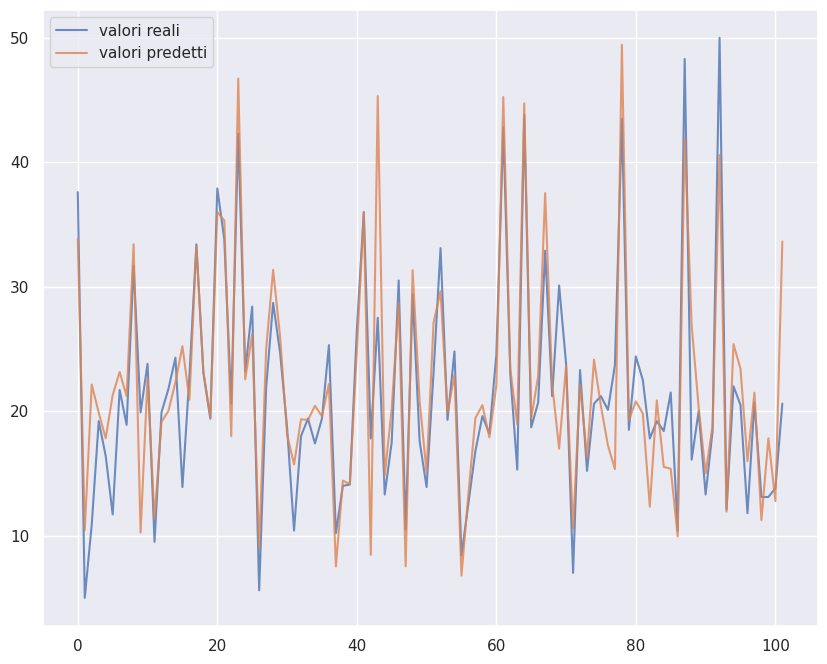

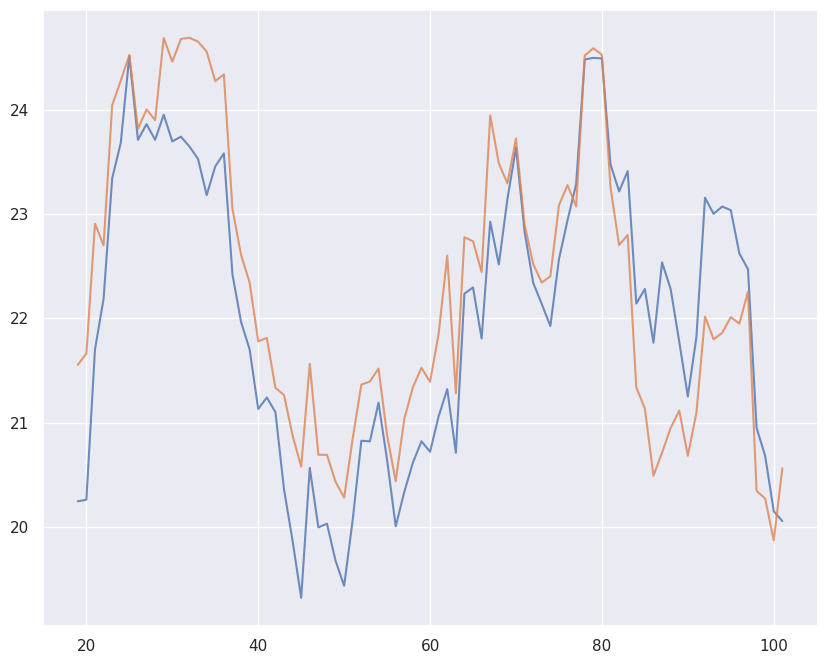

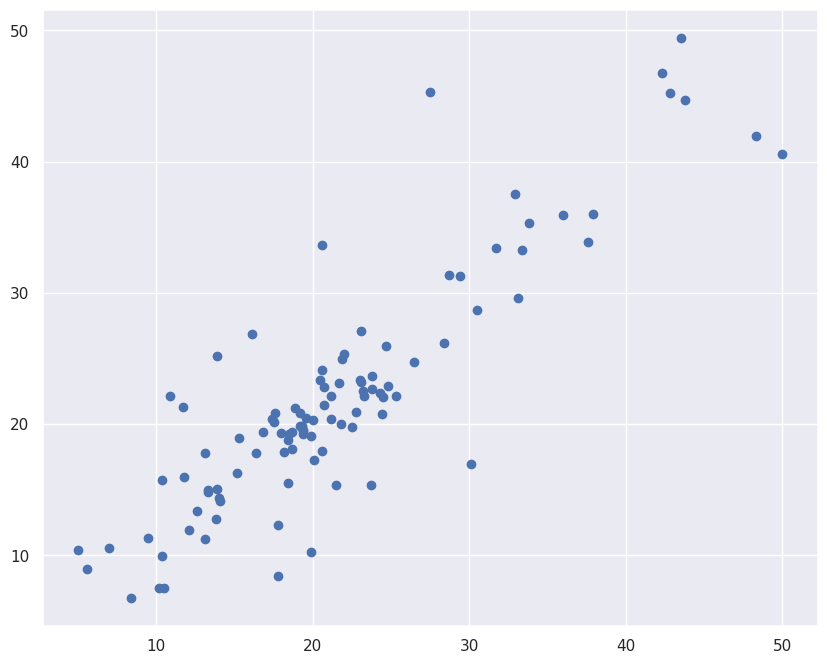

In [ ]:
test_model(X, Y)

# **4. DEPLOY**



- libreria per esportare i file .pmml: https://github.com/jpmml/sklearn2pmml
- libreria per importare i file .pmml: https://github.com/autodeployai/pypmml

In [ ]:
# installazione di  sklearn2pmml
!pip install sklearn2pmml

#installazione pypmml
!pip install pypmml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 17.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 11.4 MB/s eta 0:00:00
  Created wheel for sklearn2pmml: filename=sklearn2pmml-0.98.1-py3-none-any.whl size=7051306 sha256=91e69c53d3361dbe780cd0498dd4588e556ff1cd68c93897391e8f0c93f27297
  Stored in directory: /root/.cache/pip/wheels/7c/44/b2/48ffeecd45f409ea55fb0c10fa56023efb8432cb9deb679a82
Successfully built sklearn2pmml
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.2/14.2 MB 24.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pypmml: filename=pypmml-0.9.17-py3-none-any.whl size=14215033 sha256=0336c2f5feb5e4d11a1ad04a5aab820f2aa80d91e5eaad4cd33ec807f8034c60
  Stored in directory: /root/.cache/pip/wheels/8c/74/f1/946a04acaa6de2e9df0f02739511aba5a7aac52383c52ac900
Successfully built pypmml


##  **4.1 Save**

In [ ]:
from sklearn2pmml import sklearn2pmml
from sklearn2pmml.pipeline import PMMLPipeline


def save_model():
  # sklearn2pmml vuole feature e labels come dataframe
  # con i nomi associati alle colonne
  X = df.drop("MEDV", axis=1)
  Y = df["MEDV"]
  x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)


  # [1] train final model
  slc   = StandardScaler()
  poly  = PolynomialFeatures(degree=poly_degree)
  ridge = Ridge(alpha=ridge_alpha, fit_intercept=ridge_intercept)

  pmml_pipe = PMMLPipeline(steps=[ ("slc", slc),
                              ("poly", poly),
                              ("ridge", ridge)] )
  pmml_pipe.fit(x_train, y_train)


  # ===========
  # [2] OUT
  # ============
  sklearn2pmml(pmml_pipe, "housing.pmml", with_repr = True)


save_model()


##  **4.2 Load**

In [ ]:
from pypmml import Model


new_df = pd.read_csv("https://raw.githubusercontent.com/FabioGagliardiIts/datasets/main/boston_housing/NewBostonHousing.csv")
display(new_df)
new_df = new_df.drop(['index'], axis = 1)



# ==========
# [1] IN
# ==========
model = Model.fromFile('housing.pmml')

# ===============
# [2] PREDICT
# ===============
Y_pred = model.predict(new_df)

display(Y_pred)



,index,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
0,302,0.08190,34.0,6.09,0.433,6.495,18.4,5.4917,7,329,16.1,8.670000
1,66,0.04379,80.0,3.37,0.398,5.787,31.1,6.6115,4,337,16.1,10.240000
2,440,6.89895,12.5,18.10,0.740,5.818,92.4,1.8662,24,666,20.2,12.715432


,predicted_MEDV
0,26.833052
1,20.074399
2,20.153843
